<div align="center">
    <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/39794/logos/header.png?t=2022-10-09-15-55-28">
    <div><h1>The Smith Parasite - An Unknown Parasitic Disease</h1>
    <h3>Who is more likely to suffer from the Smith Parasite?</h3></div>

<table>
<thead>
  <tr>
    <th>First Name</th>
    <th>Last Name</th>
    <th>ID</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Ariel</td>
    <td>Cerda</td>
    <td></td>
  </tr>
  <tr>
    <td>Gonçalo</td>
    <td>Coutinho</td>
    <td></td>
  </tr>
  <tr>
    <td>Julio<br></td>
    <td>Vigueras</td>
    <td></td>
  </tr>
  <tr>
    <td>Luis</td>
    <td>Fernandes</td>
    <td></td>
  </tr>
  <tr>
    <td>Miguelangel</td>
    <td>Mayuare<br></td>
    <td>20220665</td>
  </tr>
</tbody>
</table>    
    
</div>



## Proposed action plan

For those who have more experience with exploring, cleaning, etc. Please, help with the plan so everybody can follow the same guidelines

This is what I propose:

### Steps for the project
#### 1. Frame the problem
This point is pretty clear. Is a classification problem to predict if a list of people have the parasite or not.
#### 2. Explore de data to ge insights
In this step we can use all the techniques required to inform us about the data, which features are useful and which aren't, like visualization, educated assumptions, etc.
#### 3. Prepare the data
All the dropping, dummyfication, transforming and feature engineering.
#### 4. Explore different models and choose the best ones
As it states, here we try the models and use the cross-validation.
#### 5. Fine-tuning and possibly combine the models with some ensemble technique
Using grid search or similar to obtain the best hyper-parameters and if it is better, combine the models.
#### 6. Predict with the competition test set and submit

As the rules says, we can submit 20 times per day, so there is a lot of room for experimentation.


## Version control

We can use **Kaggle** to set new version of a collaborative notebook, nevertheless, we can work locally on our own computers. I do prefer to work locally and then upload the notebook to **Kaggle**.

It's about downloading the notebook from **Kaggle** work in your computer and uploading again. After uploading, the version must be saved in order to others to see it. Version can be compared using **Kaggle** tools.

If any of us are a software engineer or is used to **git**, then can teach the others and maybe we can all benefit of it, considering that **git** and **GitHub** are a much robust version control system. I'm not used to **GitHub**.

## Developing environment
It is better if we all use the same python version and packages and set an environment exclusively for the project, different from any other project.

Anaconda is good for that, I can create an environment and pass the file, so you can create an environment with the exact same packages.

If by majority, we prefer to work here in **Kaggle**, we will have the same environment and there is no need to share environments.

## Developing

The next cells shows a very naive data exploration, feature engineering and modeling, it is disordered, not following the guidelines shown above, but it gave a jump start to know the model.

When modifying the notebook, don't worry if you delete instead of comment lines. If we use the version control system, versions can be compared.

Let's get ready to rumble!

*Miguelangel Mayuare*

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# scikit learn imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score



In [2]:
# import all the files
train_demo = pd.read_excel('data/train_demo.xlsx')
train_habits = pd.read_excel('data/train_habits.xlsx')
train_health = pd.read_excel('data/train_health.xlsx')
test_demo = pd.read_excel('data/test_demo.xlsx')
test_habits = pd.read_excel('data/test_habits.xlsx')
test_health = pd.read_excel('data/test_health.xlsx')

In [4]:
# check the files in the following cells

In [3]:
train_demo.head()

,PatientID,Name,Birth_Year,Region,Education,Disease
0,1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1
1,1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1
2,1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1
3,1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0
4,1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1


In [4]:
train_habits.head()

,PatientID,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit
0,1167,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
1,1805,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters
2,1557,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
3,1658,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter
4,1544,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter


In [5]:
train_habits['Smoking_Habit'].value_counts(), train_habits['Exercise'].value_counts()

(No     673
 Yes    127
 Name: Smoking_Habit, dtype: int64,
 No     536
 Yes    264
 Name: Exercise, dtype: int64)

In [6]:
train_health.head()

,PatientID,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
0,1167,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1,1805,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
2,1557,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
3,1658,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
4,1544,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


In [7]:
# join all on ids
data = train_demo.merge(train_habits, how='left')
data = data.merge(train_health, how='left')
data_test = test_demo.merge(test_habits, how='left')
data_test = data_test.merge(test_health, how='left')
data.set_index('PatientID', inplace=True)
data_test.set_index('PatientID', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    object
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    object
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null    object
dtypes: int64(7),

In [9]:
# set X as the features and y as the target
X = data.drop('Disease', axis=1).copy()
y = data['Disease'].copy()
X.head()


,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


<AxesSubplot:>

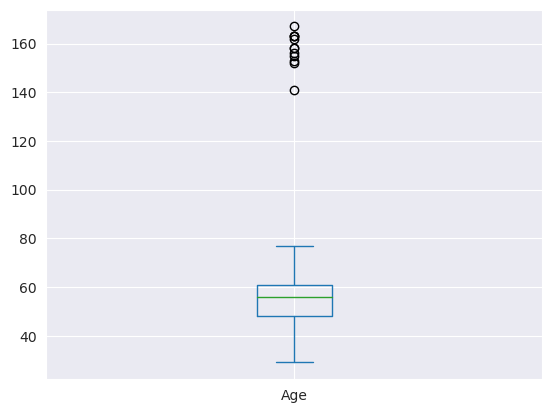

In [10]:
# check for outliers in Age, we should check in every column
X['Age'] = datetime.now().year - X['Birth_Year']
X.drop('Birth_Year', inplace=True, axis=1)
X['Age'].plot(kind='box')

In [13]:
# check proportion of outliers
(X['Age'] > 80).value_counts(normalize=True)
# outliers conforms 1.5%

False    0.985
True     0.015
Name: Age, dtype: float64

In [16]:
# impute outliers with the median
median_age = X['Age'].median()
mask = X['Age'] > 80
X['Age'].mask(mask, inplace=True)
X['Age'].fillna(median_age, inplace=True)


<bound method Series.isna of PatientID
1167    57.0
1805    53.0
1557    48.0
1658    64.0
1544    54.0
        ... 
1909    50.0
1386    42.0
1088    56.0
1662    47.0
1117    43.0
Name: Age, Length: 800, dtype: float64>

In [17]:
X['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 800 entries, 1167 to 1117
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
800 non-null    float64
dtypes: float64(1)
memory usage: 12.5 KB


In [18]:
# set smoking and exercise as binary
X['Smoking_Habit'].replace(['Yes', 'No'], [1, 0], inplace=True)
X['Exercise'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [14]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 800 entries, 1167 to 1117
Series name: Disease
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 12.5 KB


In [10]:
X.head()

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),0,I consider myself a social drinker,0,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


In [19]:
# drop the name column
X.drop('Name', axis=1, inplace=True)

In [20]:
X['Region'] = X['Region'].str.title()
data_test['Region'] = data_test['Region'].str.title()
X.Region.unique()

array(['London', 'South West', 'Yorkshire And The Humber', 'South East',
       'East Midlands', 'West Midlands', 'East Of England', 'North West',
       'North East'], dtype=object)

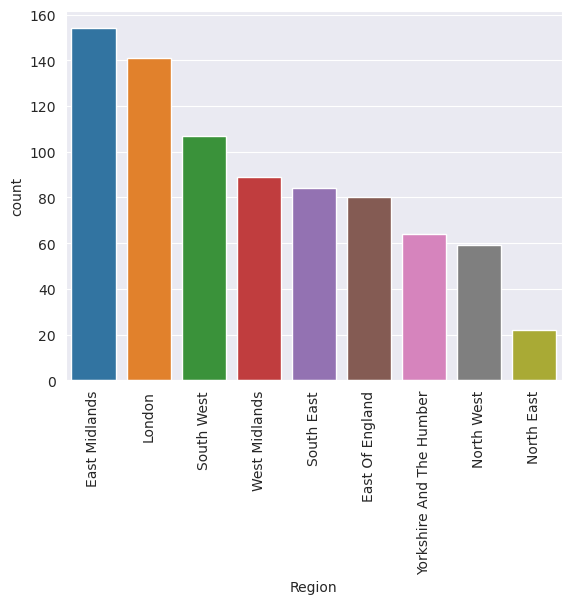

In [21]:
sns.countplot(x=X['Region'], order=X['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

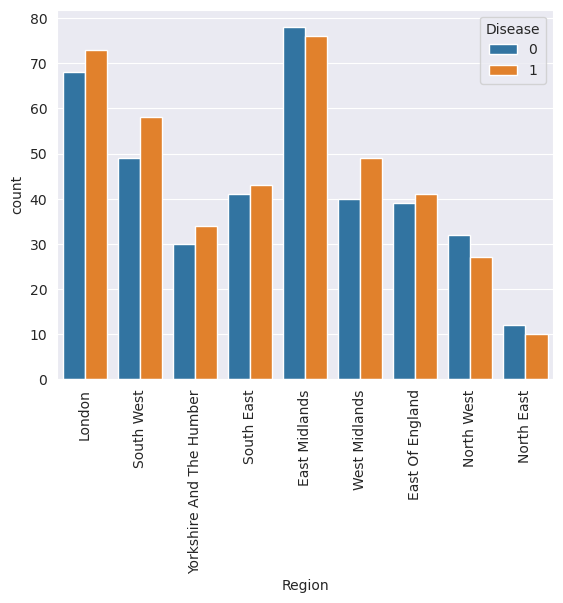

In [22]:
sns.countplot(data=X, x='Region', hue=y)
plt.xticks(rotation=90)
plt.show()

It seems that being from certain region, does not affect the outcome. The infected ration is approximately 0.5 in each region

In [23]:
X.drop('Region', inplace=True, axis=1)

In [13]:
X.Education.unique()

array(['High School Incomplete (10th to 11th grade)',
       'Elementary School (1st to 9th grade)',
       'University Complete (3 or more years)',
       'University Incomplete (1 to 2 years)', nan,
       'High School Graduate', 'I never attended school / Other'],
      dtype=object)

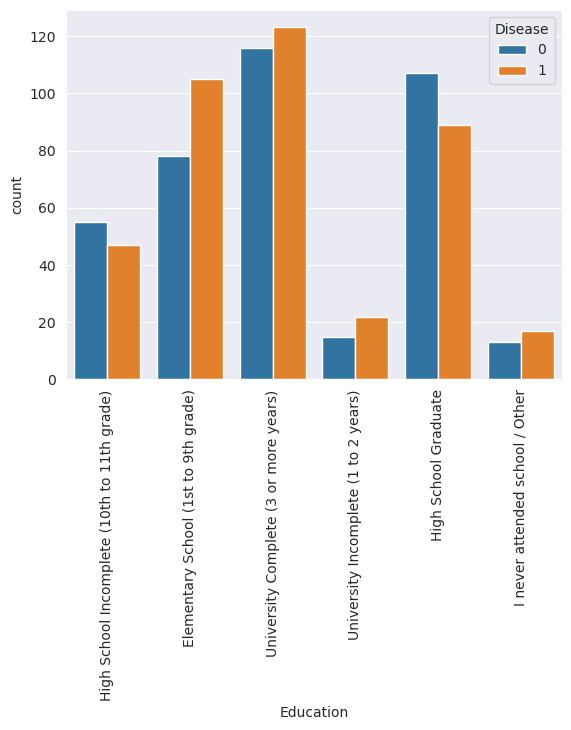

In [37]:
sns.countplot(data=X, x='Education', hue=y)
plt.xticks(rotation=90)
plt.show()

apart from Those with elementary school, there seems to not be a trend

In [13]:
corr_matrix = X.corr()
corr_matrix

,Birth_Year,Smoking_Habit,Exercise,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health
Birth_Year,1.000000,-0.070033,-0.033557,0.097544,0.160576,-0.232736,-0.122117,0.199528,-0.159870
Smoking_Habit,-0.070033,1.000000,0.066124,0.032011,-0.012176,0.020645,0.195928,0.002660,0.031429
Exercise,-0.033557,0.066124,1.000000,0.056073,-0.187853,0.038320,0.077965,-0.341365,0.314121
Height,0.097544,0.032011,0.056073,1.000000,0.512673,-0.091066,-0.018564,-0.042378,0.059302
Weight,0.160576,-0.012176,-0.187853,0.512673,1.000000,-0.051133,-0.094461,0.301311,-0.387060
High_Cholesterol,-0.232736,0.020645,0.038320,-0.091066,-0.051133,1.000000,0.117339,0.002479,0.044540
Blood_Pressure,-0.122117,0.195928,0.077965,-0.018564,-0.094461,0.117339,1.000000,-0.025034,0.158393
Mental_Health,0.199528,0.002660,-0.341365,-0.042378,0.301311,0.002479,-0.025034,1.000000,-0.333152
Physical_Health,-0.159870,0.031429,0.314121,0.059302,-0.387060,0.044540,0.158393,-0.333152,1.000000


In [14]:
# check for imbalances, should do this in first cells
y.value_counts(normalize=True)

1    0.51375
0    0.48625
Name: Disease, dtype: float64

In [24]:
X_num = X.select_dtypes(include='number')
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num, y, test_size=0.2, stratify=y, random_state=1230)
min_max = MinMaxScaler()
X_num_train = min_max.fit_transform(X_num_train)
X_num_test = min_max.transform(X_num_test)


In [25]:
lr = LogisticRegression()


In [26]:
lr.fit(X_num_train, y_train)
y_train_pred = lr.predict(X_num_train)
y_pred = lr.predict(X_num_test)

In [27]:
print(lr.score(X_num_train, y_train))
print(lr.score(X_num_test, y_test))

0.7796875
0.7875


In [28]:
f1_score(y_train, y_train_pred), f1_score(y_test, y_pred)

(0.794759825327511, 0.8023255813953488)